In [ ]:
#Instalar librerías
if(!require(ggplot2)) install.packages('ggplot2')
if(!require(readr)) install.packages('readr')
if(!require(dplyr)) install.packages('dplyr')
if (!require(caret)) install.packages('caret')

#Cargar
library(ggplot2)
library(readr)
library(dplyr)
library(caret)

In [ ]:
if (!require(glmnet)) install.packages('glmnet')

library(glmnet)

In [ ]:
data <- read_csv("EmployeeData.csv")

Rows: 3000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Department, Gender
dbl (7): EmployeeID, Experience, EducationLevel, PerformanceScore, Age, Work...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Regresión Lineal Simple

In [ ]:
modelo_lineal <- lm(Salary ~ EducationLevel, data = data)

In [ ]:
summary(modelo_lineal)


Call:
lm(formula = Salary ~ EducationLevel, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-49466 -15080  -1563  13087  55748 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     74181.0      887.9  83.543  < 2e-16 ***
EducationLevel   2134.2      325.1   6.564 6.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19990 on 2998 degrees of freedom
Multiple R-squared:  0.01417,	Adjusted R-squared:  0.01384 
F-statistic: 43.09 on 1 and 2998 DF,  p-value: 6.149e-11


`geom_smooth()` using formula = 'y ~ x'


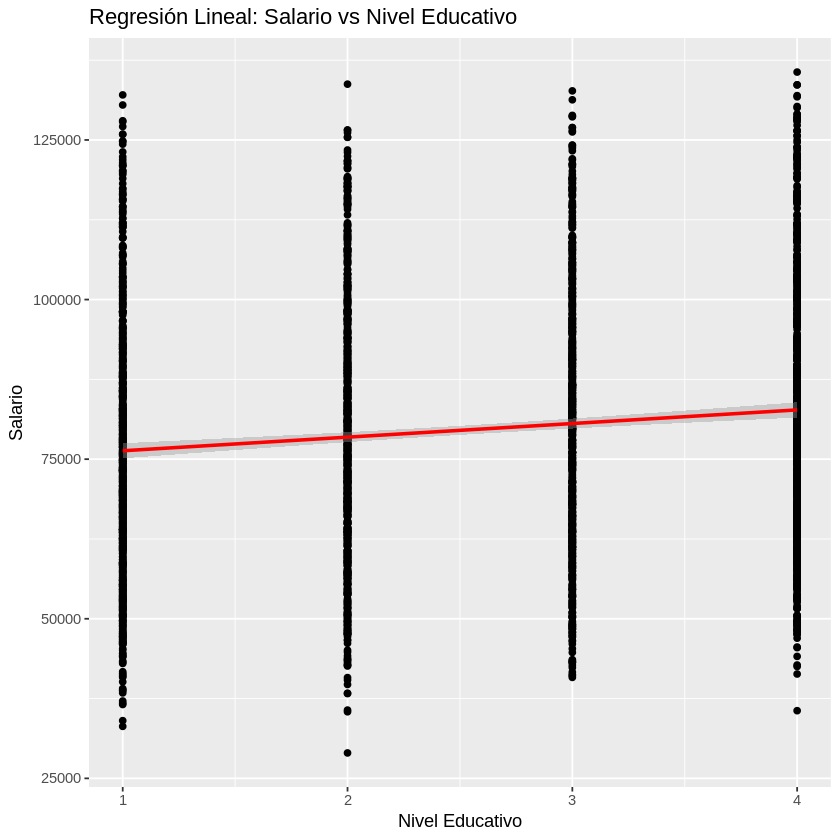

In [ ]:
ggplot(data, aes(x = EducationLevel, y = Salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Regresión Lineal: Salario vs Nivel Educativo",
       x = "Nivel Educativo", y = "Salario")

Regresión Polinómica

In [ ]:
data$EducationLevelSquared <- data$EducationLevel^2

In [ ]:
modelo_polinomico <- lm(Salary ~ EducationLevel + EducationLevelSquared, data = data)

In [ ]:
summary(modelo_polinomico)


Call:
lm(formula = Salary ~ EducationLevel + EducationLevelSquared, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-50054 -15111  -1592  12899  56335 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            71247.9     2033.1  35.044   <2e-16 ***
EducationLevel          5065.2     1856.4   2.728   0.0064 ** 
EducationLevelSquared   -585.1      364.9  -1.604   0.1089    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19980 on 2997 degrees of freedom
Multiple R-squared:  0.01501,	Adjusted R-squared:  0.01436 
F-statistic: 22.84 on 2 and 2997 DF,  p-value: 1.43e-10


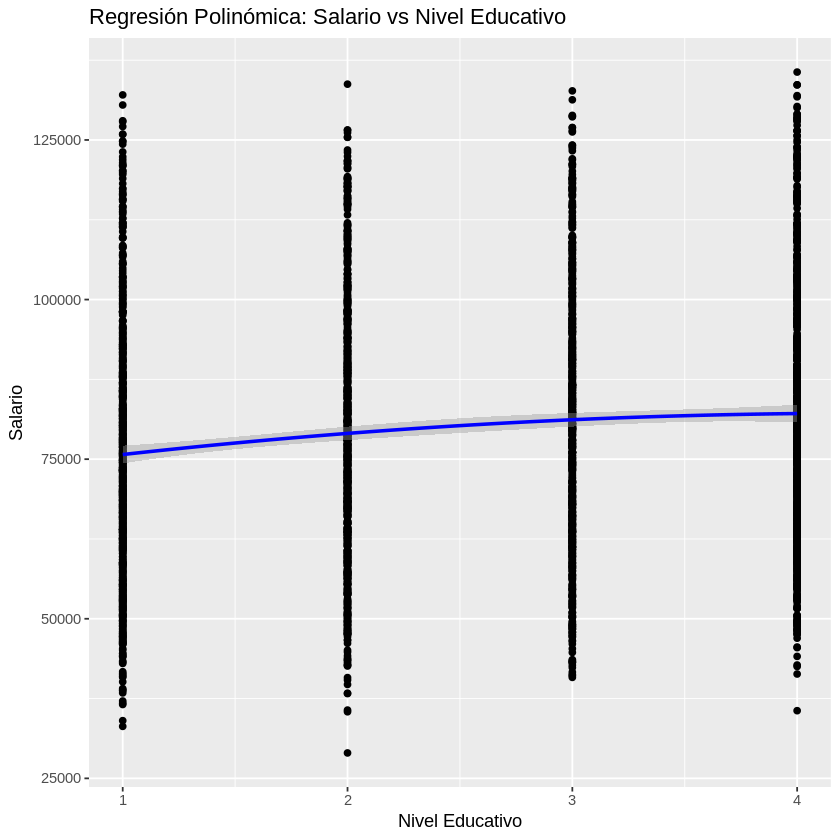

In [ ]:
ggplot(data, aes(x = EducationLevel, y = Salary)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), col = "blue") +
  labs(title = "Regresión Polinómica: Salario vs Nivel Educativo",
       x = "Nivel Educativo", y = "Salario")

Regresión lineal multiple

In [ ]:
data <- data %>% mutate(Department_IT = ifelse(Department == "IT", 1, 0),
                        Department_Finance = ifelse(Department == "Finance", 1, 0),
                        Department_HR = ifelse(Department == "HR", 1, 0),
                        Department_Marketing = ifelse(Department == "Marketing", 1, 0),
                        Department_Sales = ifelse(Department == "Sales", 1, 0))

In [ ]:
modelo_multiple <- lm(Salary ~ Experience + EducationLevel + PerformanceScore + WorkHours +
                      Department_IT + Department_Finance + Department_HR + Department_Marketing + Department_Sales,
                      data = data)

In [ ]:
summary(modelo_multiple)


Call:
lm(formula = Salary ~ Experience + EducationLevel + PerformanceScore + 
    WorkHours + Department_IT + Department_Finance + Department_HR + 
    Department_Marketing + Department_Sales, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-41037 -11370     18  11459  36488 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           69379.00    1766.32  39.279  < 2e-16 ***
Experience               13.69      23.10   0.592   0.5536    
EducationLevel         2033.48     238.84   8.514  < 2e-16 ***
PerformanceScore       1253.74     230.88   5.430 6.08e-08 ***
WorkHours               -67.60      30.10  -2.246   0.0248 *  
Department_IT         23147.40     839.75  27.565  < 2e-16 ***
Department_Finance    15547.44     846.75  18.361  < 2e-16 ***
Department_HR        -12790.79     853.86 -14.980  < 2e-16 ***
Department_Marketing  -6607.30     845.79  -7.812 7.73e-15 ***
Department_Sales       

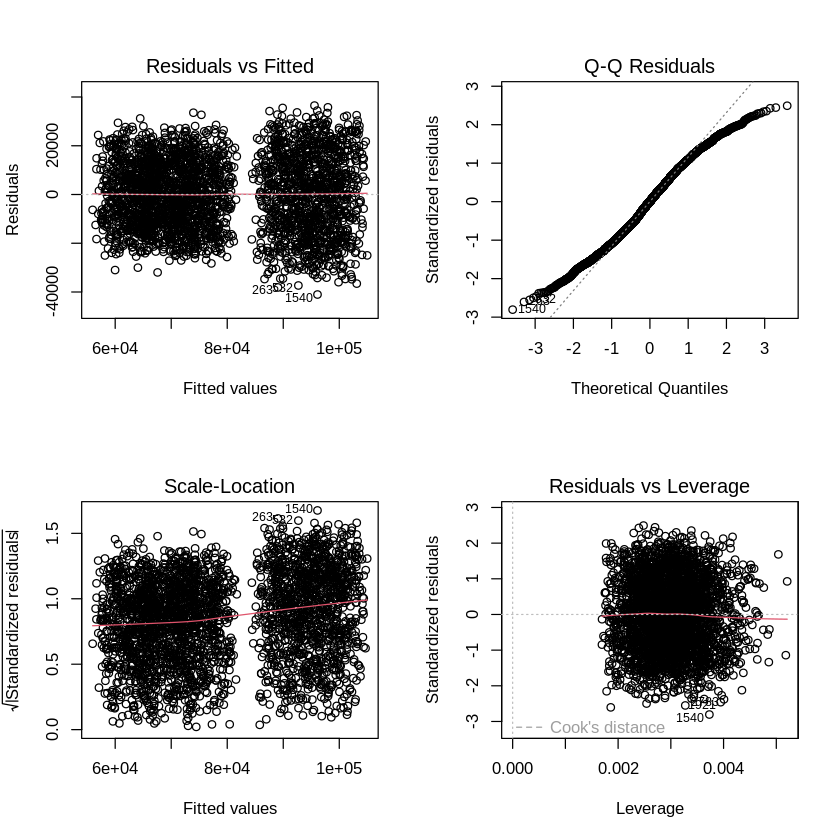

In [ ]:
par(mfrow=c(2,2))
plot(modelo_multiple)

`geom_smooth()` using formula = 'y ~ x'


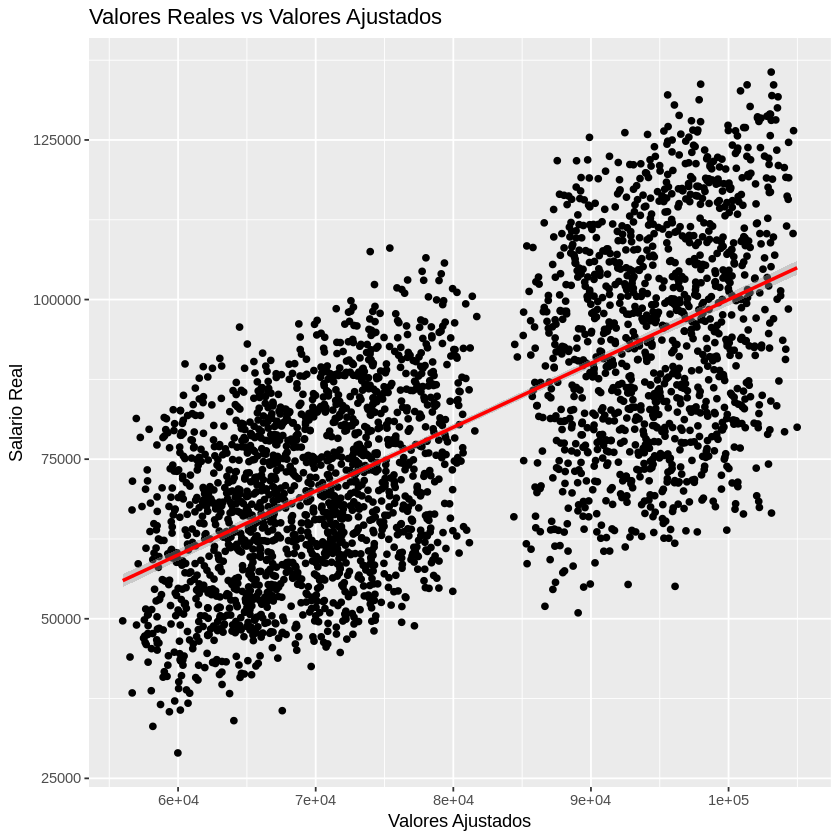

In [ ]:
ggplot(data, aes(x = modelo_multiple$fitted.values, y = Salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Valores Reales vs Valores Ajustados",
       x = "Valores Ajustados", y = "Salario Real")

Eliminamos la variable Experience ya que no es significativa

In [ ]:
modelo_sin_experience <- lm(Salary ~ EducationLevel + PerformanceScore + WorkHours +
                            Department_IT + Department_Finance + Department_HR + Department_Marketing + Department_Sales,
                            data = data)

summary(modelo_sin_experience)


Call:
lm(formula = Salary ~ EducationLevel + PerformanceScore + WorkHours + 
    Department_IT + Department_Finance + Department_HR + Department_Marketing + 
    Department_Sales, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-41212 -11451     19  11506  36350 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           69647.28    1707.11  40.798  < 2e-16 ***
EducationLevel         2039.87     238.57   8.551  < 2e-16 ***
PerformanceScore       1253.42     230.86   5.429 6.11e-08 ***
WorkHours               -67.81      30.09  -2.253   0.0243 *  
Department_IT         23143.71     839.64  27.564  < 2e-16 ***
Department_Finance    15553.97     846.58  18.373  < 2e-16 ***
Department_HR        -12786.76     853.74 -14.977  < 2e-16 ***
Department_Marketing  -6606.20     845.69  -7.812 7.75e-15 ***
Department_Sales            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘*

Rige y Lasso

In [ ]:
data <- data %>%
  mutate(Department_IT = ifelse(Department == "IT", 1, 0),
         Department_Finance = ifelse(Department == "Finance", 1, 0),
         Department_HR = ifelse(Department == "HR", 1, 0),
         Department_Marketing = ifelse(Department == "Marketing", 1, 0),
         Department_Sales = ifelse(Department == "Sales", 1, 0))

In [ ]:
x <- model.matrix(Salary ~ EducationLevel + PerformanceScore + WorkHours +
                  Department_IT + Department_Finance + Department_HR +
                  Department_Marketing + Department_Sales, data = data)[,-1]

In [ ]:
y <- data$Salary

In [ ]:
x_scaled <- scale(x)
y_scaled <- scale(y)

Rige

In [ ]:
set.seed(42)
modelo_ridge <- cv.glmnet(x_scaled, y_scaled, alpha = 0)

In [ ]:
best_lambda_ridge <- modelo_ridge$lambda.min

print(paste("Mejor lambda para Ridge:", best_lambda_ridge))

[1] "Mejor lambda para Ridge: 0.0483992354139494"


In [ ]:
modelo_ridge_final <- glmnet(x_scaled, y_scaled, alpha = 0, lambda = best_lambda_ridge)

coef(modelo_ridge_final)

9 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           1.764647e-16
EducationLevel        1.086964e-01
PerformanceScore      6.923860e-02
WorkHours            -2.821231e-02
Department_IT         3.727820e-01
Department_Finance    2.230255e-01
Department_HR        -3.151513e-01
Department_Marketing -2.011843e-01
Department_Sales     -7.472363e-02

Lasso

In [ ]:
set.seed(42)
modelo_lasso <- cv.glmnet(x_scaled, y_scaled, alpha = 1)

In [ ]:
best_lambda_lasso <- modelo_lasso$lambda.min

print(paste("Mejor lambda para Lasso:", best_lambda_lasso))

[1] "Mejor lambda para Lasso: 0.00182220014431356"


In [ ]:
modelo_lasso_final <- glmnet(x_scaled, y_scaled, alpha = 1, lambda = best_lambda_lasso)

coef(modelo_lasso_final)

9 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           1.276621e-16
EducationLevel        1.119789e-01
PerformanceScore      7.045854e-02
WorkHours            -2.804685e-02
Department_IT         4.640224e-01
Department_Finance    3.077016e-01
Department_HR        -2.494329e-01
Department_Marketing -1.298622e-01
Department_Sales      .           

Evaluacion

In [ ]:
predicciones_ridge <- predict(modelo_ridge_final, s = best_lambda_ridge, newx = x_scaled)

In [ ]:
predicciones_lasso <- predict(modelo_lasso_final, s = best_lambda_lasso, newx = x_scaled)

In [ ]:
rmse_ridge <- sqrt(mean((y_scaled - predicciones_ridge)^2))
print(paste("RMSE para Ridge:", rmse_ridge))

rmse_lasso <- sqrt(mean((y_scaled - predicciones_lasso)^2))
print(paste("RMSE para Lasso:", rmse_lasso))

[1] "RMSE para Ridge: 0.727475842814404"
[1] "RMSE para Lasso: 0.727038010759168"


optamos por lasso

In [ ]:
modelo_sin_sales <- lm(Salary ~ EducationLevel + PerformanceScore + WorkHours +
                       Department_IT + Department_Finance + Department_HR + Department_Marketing,
                       data = data)

summary(modelo_sin_sales)


Call:
lm(formula = Salary ~ EducationLevel + PerformanceScore + WorkHours + 
    Department_IT + Department_Finance + Department_HR + Department_Marketing, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-41212 -11451     19  11506  36350 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           69647.28    1707.11  40.798  < 2e-16 ***
EducationLevel         2039.87     238.57   8.551  < 2e-16 ***
PerformanceScore       1253.42     230.86   5.429 6.11e-08 ***
WorkHours               -67.81      30.09  -2.253   0.0243 *  
Department_IT         23143.71     839.64  27.564  < 2e-16 ***
Department_Finance    15553.97     846.58  18.373  < 2e-16 ***
Department_HR        -12786.76     853.74 -14.977  < 2e-16 ***
Department_Marketing  -6606.20     845.69  -7.812 7.75e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14650 on 2992 degrees of freedom
Multiple R-squared:  0.4713,	Adju

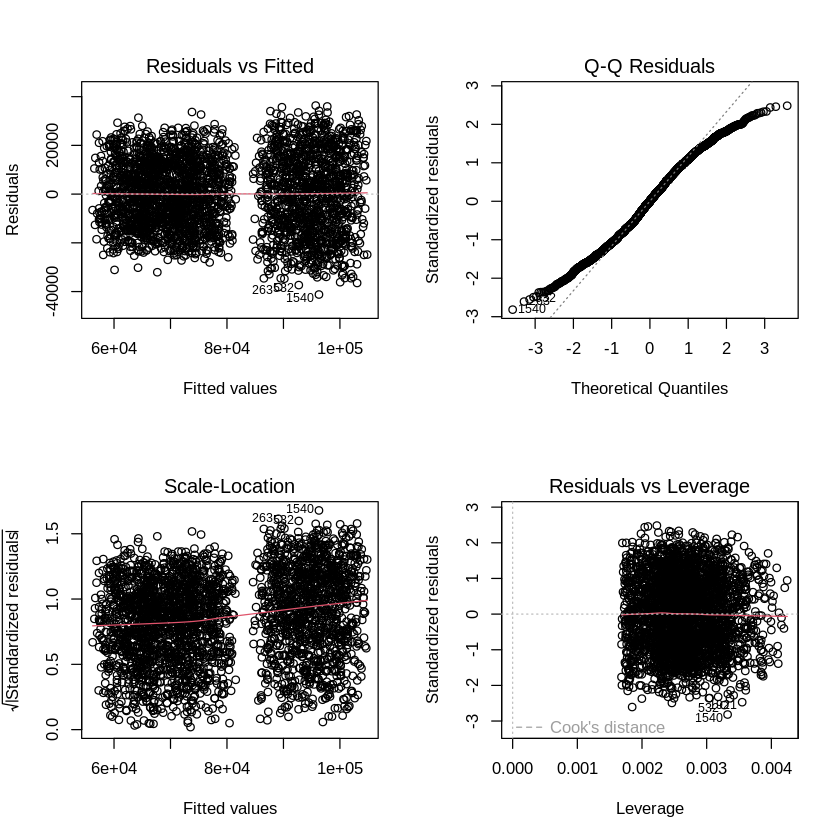

In [ ]:
par(mfrow=c(2,2))
plot(modelo_sin_sales)

`geom_smooth()` using formula = 'y ~ x'


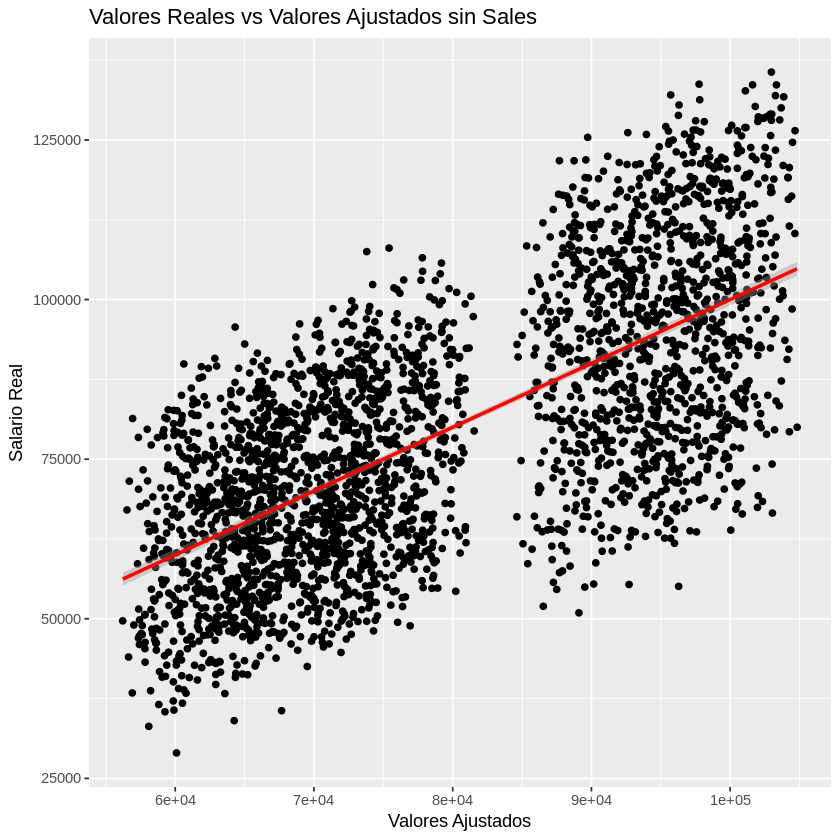

In [ ]:
ggplot(data, aes(x = modelo_sin_sales$fitted.values, y = Salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Valores Reales vs Valores Ajustados sin Sales",
       x = "Valores Ajustados", y = "Salario Real")

Regresion logistica

In [ ]:
salario_median <- median(data$Salary)
data <- data %>% mutate(HighSalary = ifelse(Salary >= salario_median, 1, 0))

In [ ]:
data$HighSalary <- as.factor(data$HighSalary)

In [ ]:
summary(data$HighSalary)

0    1 
1500 1500

In [ ]:
modelo_logistico <- glm(HighSalary ~ EducationLevel + PerformanceScore + WorkHours +
                        Department_IT + Department_Finance + Department_HR +
                        Department_Marketing + Department_Sales,
                        data = data, family = binomial)

summary(modelo_logistico)


Call:
glm(formula = HighSalary ~ EducationLevel + PerformanceScore + 
    WorkHours + Department_IT + Department_Finance + Department_HR + 
    Department_Marketing + Department_Sales, family = binomial, 
    data = data)

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.812722   0.275887  -2.946  0.00322 ** 
EducationLevel        0.228351   0.039342   5.804 6.46e-09 ***
PerformanceScore      0.098673   0.037818   2.609  0.00908 ** 
WorkHours            -0.006633   0.004936  -1.344  0.17903    
Department_IT         2.058038   0.142313  14.461  < 2e-16 ***
Department_Finance    1.387292   0.126887  10.933  < 2e-16 ***
Department_HR        -1.540432   0.144649 -10.649  < 2e-16 ***
Department_Marketing -0.698635   0.123577  -5.653 1.57e-08 ***
Department_Sales            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter f

In [ ]:
logLik_modelo <- logLik(modelo_logistico)
logLik_null <- logLik(glm(HighSalary ~ 1, data = data, family = binomial))
pseudo_R2 <- 1 - (as.numeric(logLik_modelo) / as.numeric(logLik_null))
print(paste("Pseudo-R² de McFadden:", pseudo_R2))

[1] "Pseudo-R² de McFadden: 0.240486688113563"


In [ ]:
predicciones <- predict(modelo_logistico, type = "response")

pred_class <- ifelse(predicciones > 0.5, 1, 0)

conf_matrix <- table(Predicted = pred_class, Actual = data$HighSalary)

print(conf_matrix)

         Actual
Predicted    0    1
        0 1198  435
        1  302 1065


In [ ]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Precisión del modelo:", accuracy))

[1] "Precisión del modelo: 0.754333333333333"


`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


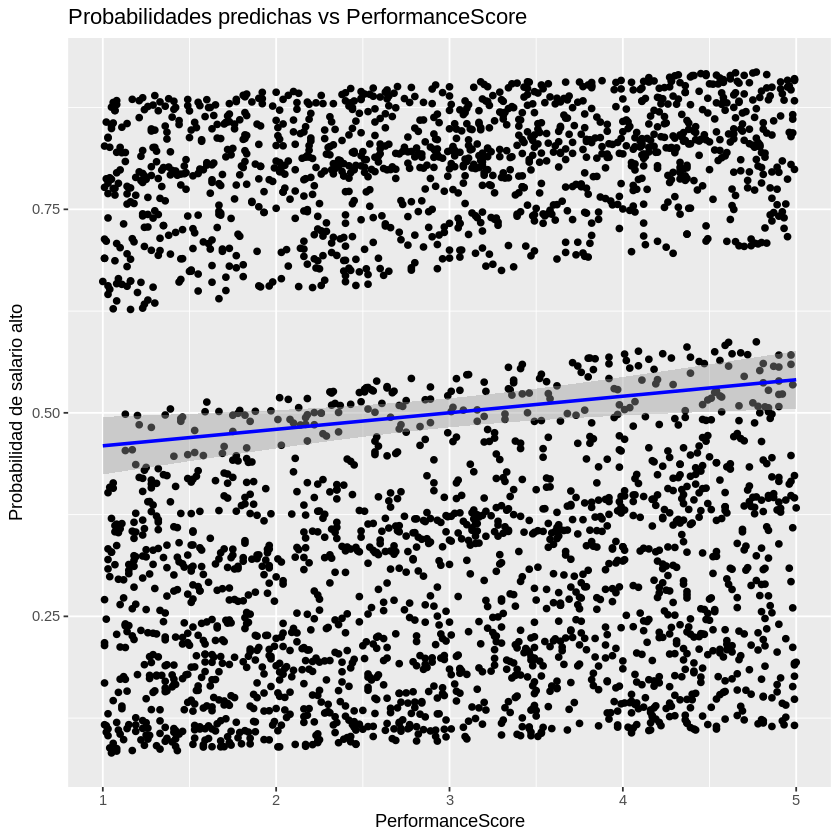

In [ ]:
ggplot(data, aes(x = PerformanceScore, y = predicciones)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), col = "blue") +
  labs(title = "Probabilidades predichas vs PerformanceScore",
       x = "PerformanceScore", y = "Probabilidad de salario alto")